<a href="https://colab.research.google.com/github/ecalatayudg/master_in_bioinformatics/blob/main/PEC2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
"""
Título: PEC 2: Redes Neuronales Artificiales
Subtítulo: Machine Learning - Máster en Bioinformática y Bioestadística
Autor: Eric Calatayud Gómez
Fecha: 7 de mayo, 2024
"""

'\nTítulo: PEC 2: Redes Neuronales Artificiales\nSubtítulo: Machine Learning - Máster en Bioinformática y Bioestadística\nAutor: Eric Calatayud Gómez\nFecha: 7 de mayo, 2024\n'

# Setup

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import tensorflow as tf
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

np.random.seed(123)

# Importación de los datos

Descargamos los datos de github con *wget*.

In [2]:
!rm Blood_samples_dataset_19.csv # elimina el archivo si ya existe
!wget https://raw.githubusercontent.com/ecalatayudg/master_in_bioinformatics/main/Blood_samples_dataset_19.csv

--2024-05-01 16:13:04--  https://raw.githubusercontent.com/ecalatayudg/master_in_bioinformatics/main/Blood_samples_dataset_19.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 787409 (769K) [text/plain]
Saving to: ‘Blood_samples_dataset_19.csv’

Blood_samples_datas 100%[===================>] 768.95K  --.-KB/s    in 0.05s   

2024-05-01 16:13:04 (16.1 MB/s) - ‘Blood_samples_dataset_19.csv’ saved [787409/787409]



Cargamos el dataset.

In [3]:
dataframe = pd.read_csv('Blood_samples_dataset_19.csv')

# Estudio exploratorio

## Estructura y análisis estadístico

Mostramos las primeras y últimas filas del dataset

In [4]:
display(dataframe)

,Glucose,Cholesterol,Hemoglobin,Platelets,Mean.Corpuscular.Volume,Mean.Corpuscular.Hemoglobin.Concentration,Insulin,BMI,Systolic.Blood.Pressure,Diastolic.Blood.Pressure,Triglycerides,HbA1c,LDL.Cholesterol,AST,Heart.Rate,Creatinine,Troponin,C.reactive.Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.631045,0.795829,0.034129,0.071774,0.185596,0.071455,0.653472,0.502665,0.215560,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.307553,0.505562,0.571162,0.839271,0.580903,0.556037,0.477742,0.856810,0.652465,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.295122,0.026808,0.582170,0.577423,0.045782,0.663642,0.088940,0.466795,0.387332,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.668719,0.501051,0.620258,0.169059,0.139289,0.160496,0.406528,0.016256,0.040137,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.442159,0.805987,0.184371,0.580175,0.118461,0.005579,0.414407,0.429431,0.146294,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.177502,0.684499,0.883908,0.257120,0.102022,0.356098,0.928344,0.670665,0.311568,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.341056,0.309766,0.525230,0.558362,0.741009,0.678500,0.299213,0.491185,0.701914,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.543017,0.838722,0.788944,0.660676,0.597290,0.663382,0.572330,0.141738,0.155871,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.136227,0.279219,0.078163,0.411167,0.355545,0.114380,0.191626,0.570553,0.171245,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes


In [5]:
print(f"Tenemos {len(dataframe)} pacientes. Hay {len(dataframe['Disease'].value_counts())} tipos de pacientes:")
dataframe['Disease'].value_counts()

Tenemos 2351 pacientes. Hay 5 tipos de pacientes:


Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64

In [6]:
print(f"Tenemos {len(dataframe.columns)-1} variables correspondientes a los parámetros de los análisis de sangre:")
dataframe.describe().T

Tenemos 18 variables correspondientes a los parámetros de los análisis de sangre:


,count,mean,std,min,25%,50%,75%,max
Glucose,2351.0,0.362828,0.251889,0.010994,0.129198,0.351722,0.582278,0.968460
Cholesterol,2351.0,0.393648,0.239449,0.012139,0.195818,0.397083,0.582178,0.905026
Hemoglobin,2351.0,0.586190,0.271498,0.003021,0.346092,0.609836,0.791215,0.983306
Platelets,2351.0,0.504027,0.303347,0.012594,0.200865,0.533962,0.754841,0.999393
Mean.Corpuscular.Volume,2351.0,0.492200,0.275735,0.046942,0.287532,0.453052,0.722293,0.995263
Mean.Corpuscular.Hemoglobin.Concentration,2351.0,0.562273,0.273281,0.006947,0.355774,0.603635,0.741381,0.975586
Insulin,2351.0,0.447062,0.242861,0.034129,0.219111,0.444806,0.654441,0.966784
BMI,2351.0,0.436679,0.242865,0.014596,0.246885,0.443725,0.601662,0.898210
Systolic.Blood.Pressure,2351.0,0.381211,0.232785,0.005988,0.179951,0.359064,0.580903,0.829100
Diastolic.Blood.Pressure,2351.0,0.421708,0.248768,0.005579,0.175469,0.474378,0.663382,0.934617


Todos los parámetros se encuentran escalados a un rango (0,1). Por lo tanto, no es necesario hacer la transformación `minmax`.

## Boxplots

Creamos un boxplot de todos los parámetros.

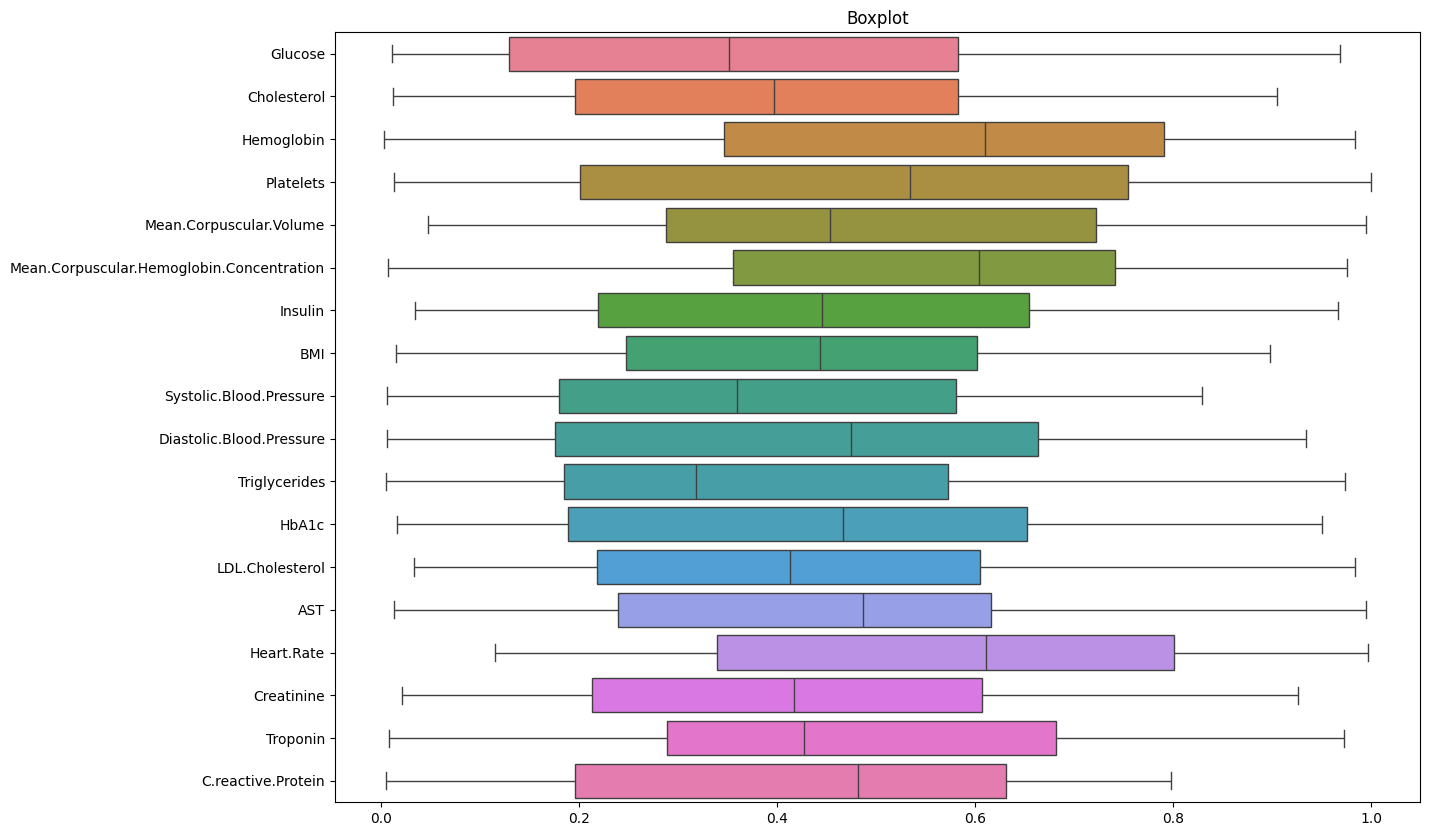

In [7]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=dataframe.drop(columns=['Disease']), orient='h')
plt.title('Boxplot')
plt.show()

## Histogramas

Representamos los parámetros en forma de histograma para ver su distribución.

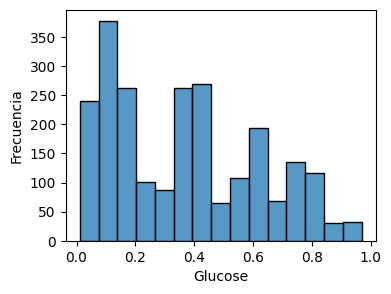

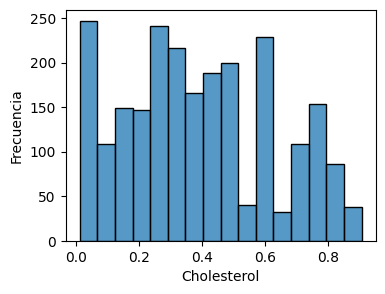

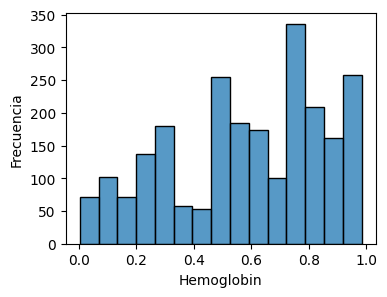

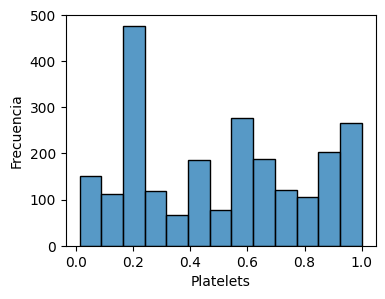

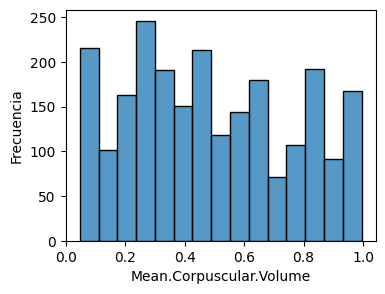

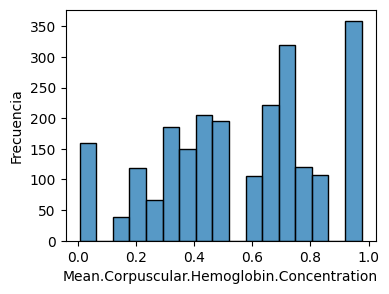

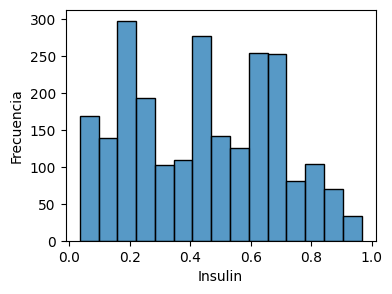

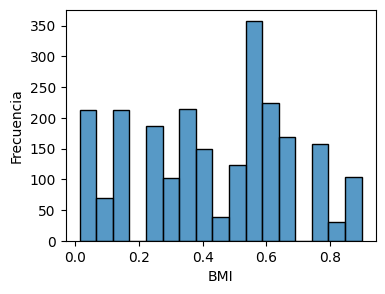

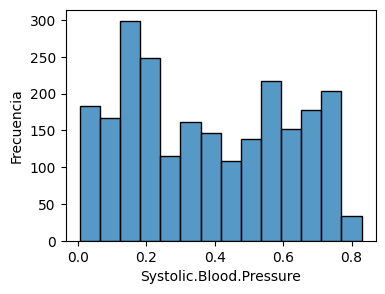

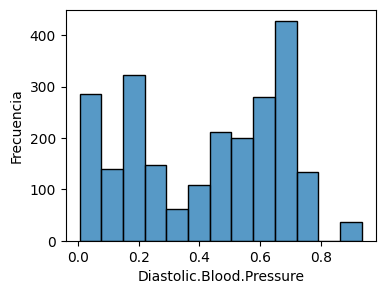

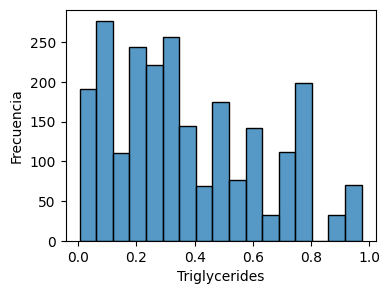

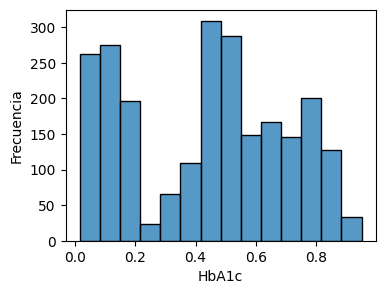

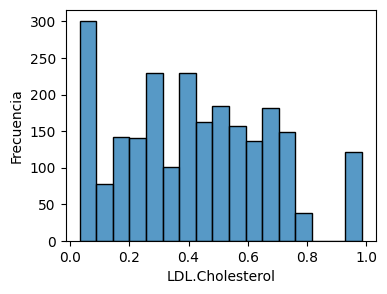

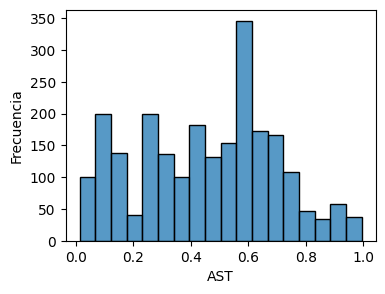

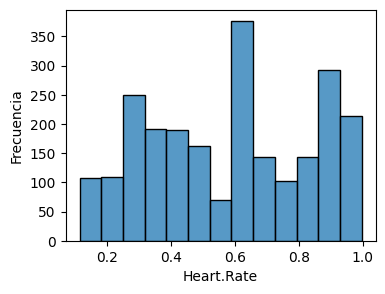

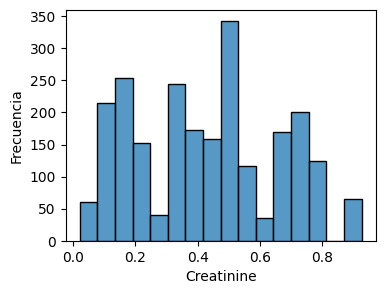

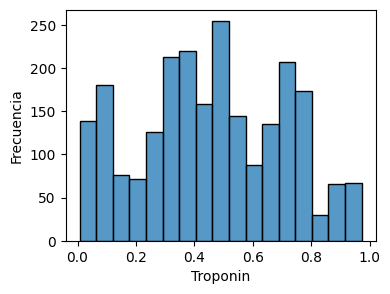

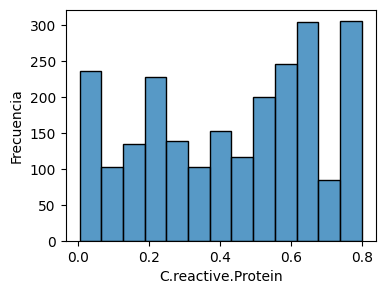

In [8]:
for column in dataframe.columns:
    if column != 'Disease':
        plt.figure(figsize=(4, 3))
        sns.histplot(data=dataframe[column])
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.show()

## Violin plots

Podemos mostrar los valores de los parámetros en función del tipo de paciente utilizando gráficos de violín.

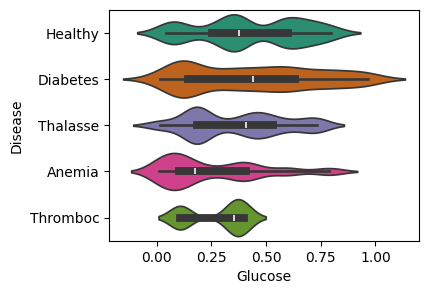

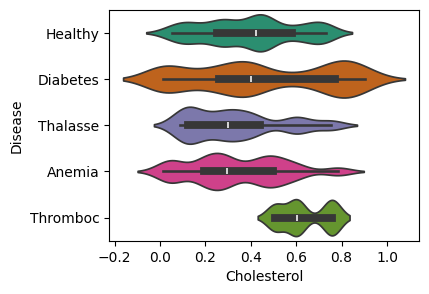

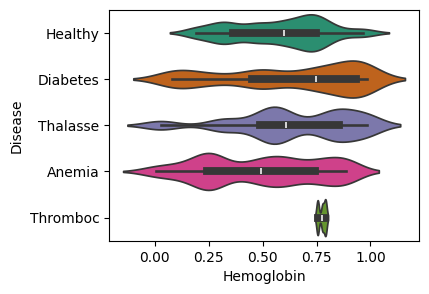

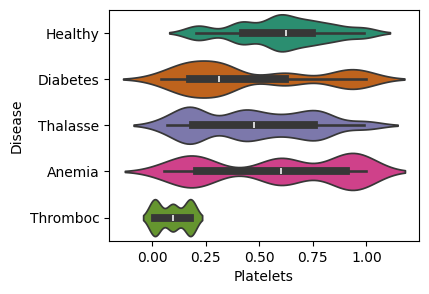

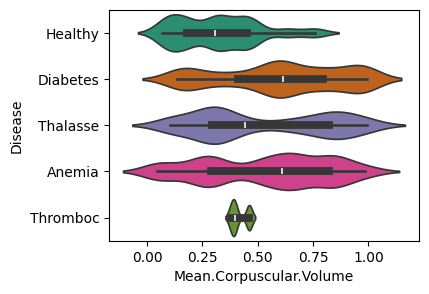

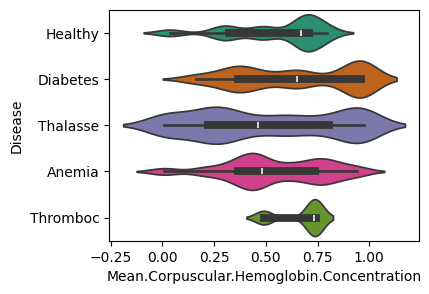

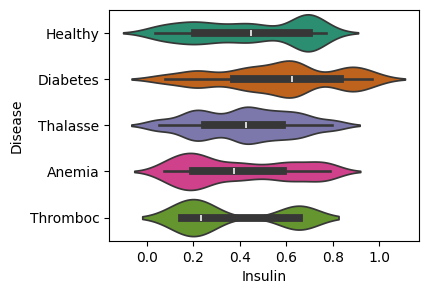

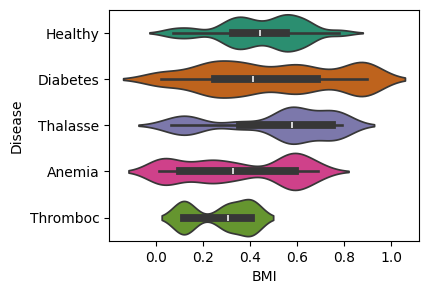

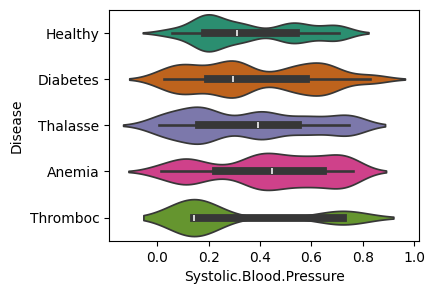

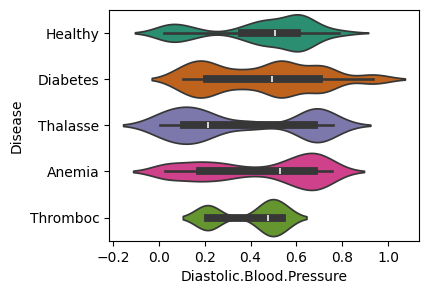

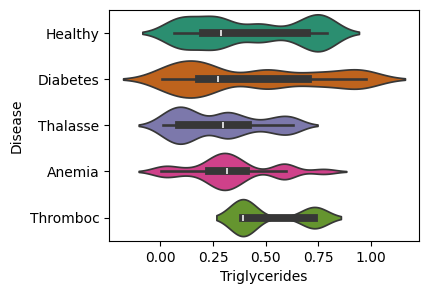

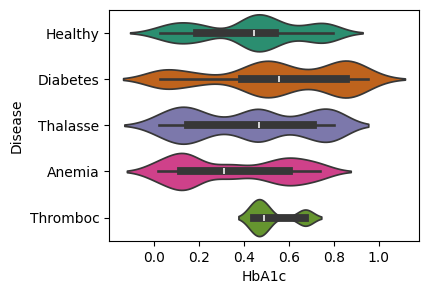

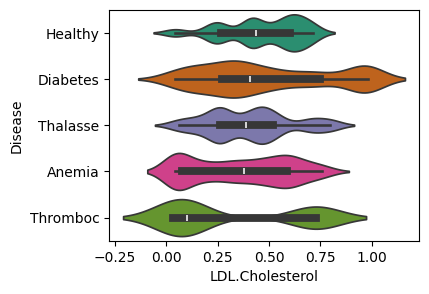

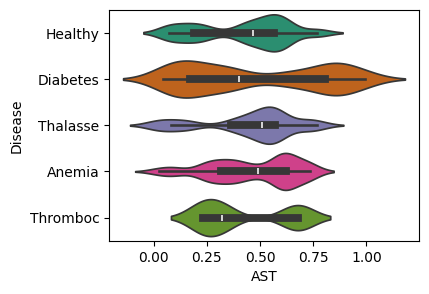

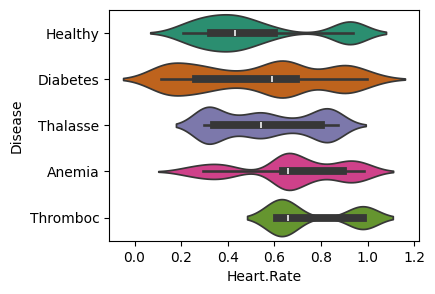

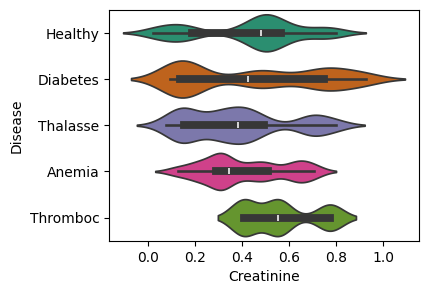

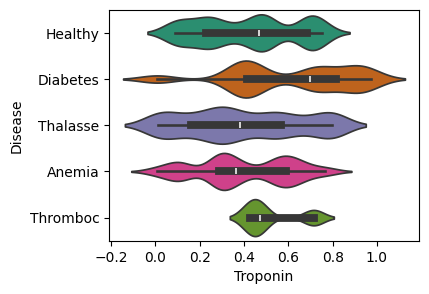

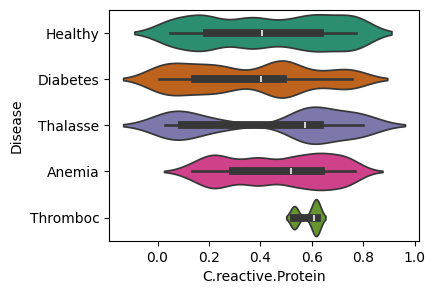

In [9]:
for column in dataframe.columns:
    if column != 'Disease':
        plt.figure(figsize=(4, 3))
        sns.violinplot(data=dataframe, x=column, y='Disease', inner='box',
                       palette='Dark2', hue='Disease', legend=False)
        plt.show()

## Matriz de correlación

Finalmente podemos visualizar las matrices de correlación:

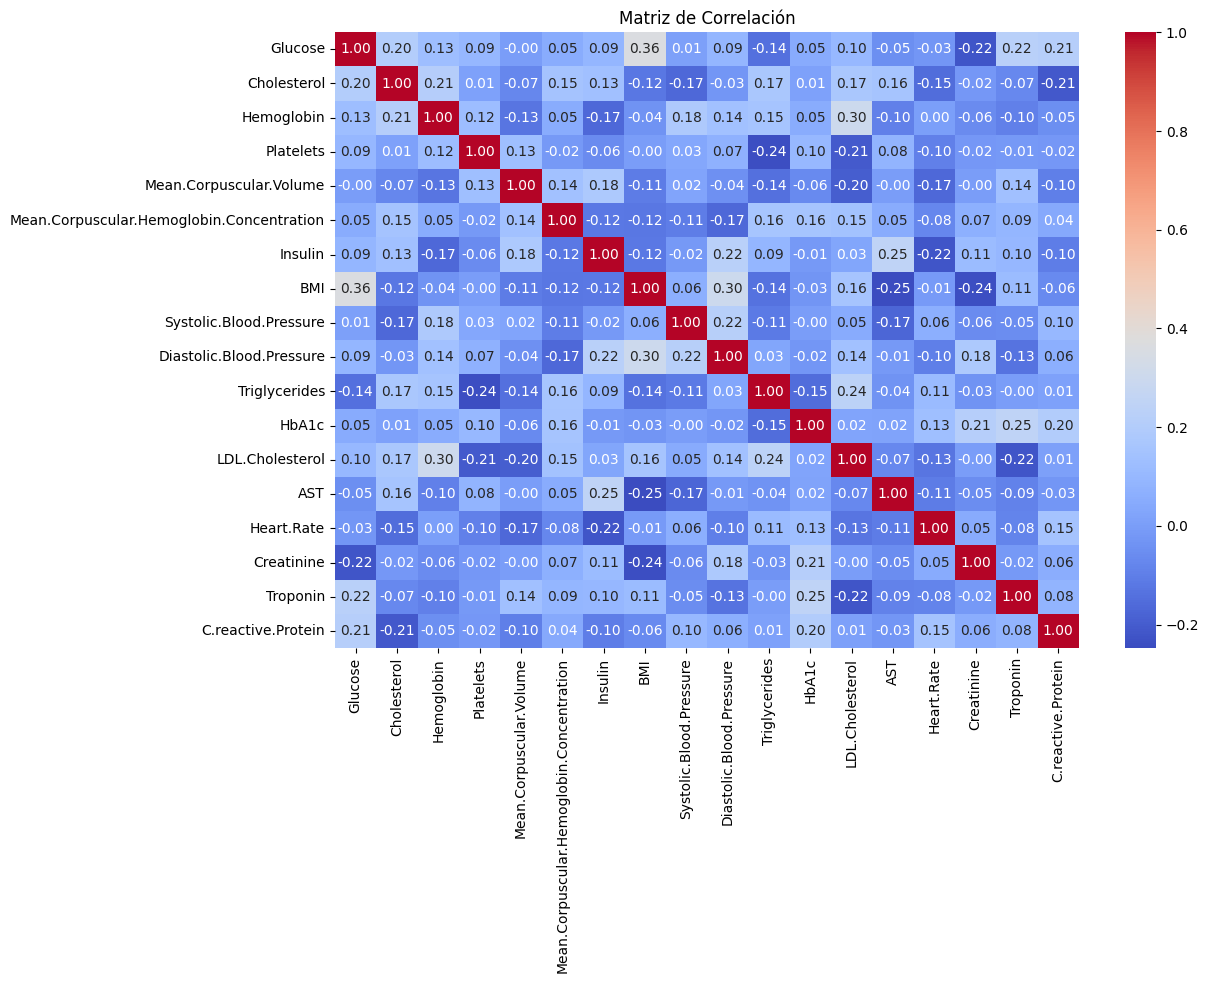

In [10]:
correlation_matrix = dataframe.drop(columns='Disease').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Creación datasets

Separamos los datos en parámetros (`X`) y etiquetas (`y`).

In [11]:
X = dataframe.drop(columns='Disease')
y = dataframe['Disease']

Convertimos las etiquetas a un valor numérico para poder entrenar el modelo correctamente.

In [12]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

Separamos los datos en conjuntos de entrenamiento (2/3) y prueba (1/3).

In [13]:
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.33, random_state=0, stratify=y_encoded)

# Red neuronal 1 capa

## Construcción del modelo

Definimos el modelo de red neuronal y añadimos las capas correspondientes:

*   Capa oculta: 10 nodos con activación ReLU
*   Capa dropout: 30%
*   Capa de salida: 5 nodos, uno por clase (5 tipos de pacientes)



In [14]:
model1 = Sequential()
model1.add(Dense(10, activation='relu', input_dim=X_train.shape[1])) # capa oculta
model1.add(Dropout(0.3)) # capa de dropout
model1.add(Dense(5, activation='softmax')) # capa de salida
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245 (980.00 B)

 Trainable params: 245 (980.00 B)

 Non-trainable params: 0 (0.00 B)

El número de parámetros se calcula con la siguiente fórmula:

$$
\text{Param} = (\text{nº entradas} + 1) * \text{nº neuronas}
$$

$$
\text{Param(capa oculta)} = (18 + 1) * 10 = 190
$$

$$
\text{Param(capa salida)} = (10 + 1) * 5 = 55
$$

En total, hay $245$ $(190 + 55)$ parámetros que se pueden entrenar.

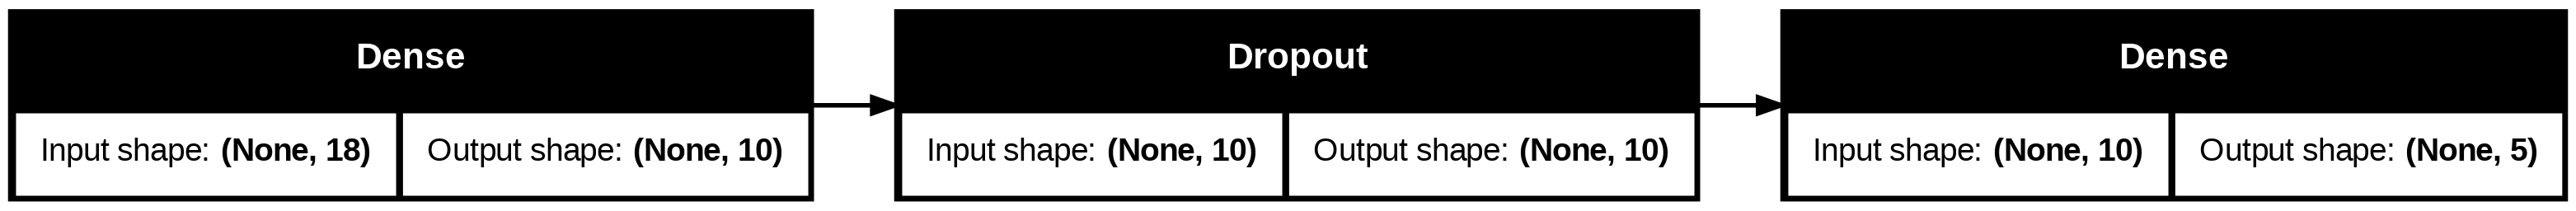

In [15]:
keras.utils.plot_model(model1, show_shapes=True, rankdir="LR")

## Entrenamiento del modelo

In [16]:
history = model1.fit(X_train, y_train_encoded, epochs=100, validation_split=0.2)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1578 - loss: 1.7188 - val_accuracy: 0.1556 - val_loss: 1.6214
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1996 - loss: 1.6446 - val_accuracy: 0.2381 - val_loss: 1.5892
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2548 - loss: 1.5791 - val_accuracy: 0.3206 - val_loss: 1.5647
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2583 - loss: 1.5761 - val_accuracy: 0.3397 - val_loss: 1.5448
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3105 - loss: 1.5393 - val_accuracy: 0.3397 - val_loss: 1.5270
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3039 - loss: 1.5468 - val_accuracy: 0.3651 - val_loss: 1.5099
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3478 - loss: 1.5046 - val_accuracy: 0.4190 - val_loss: 1.4938
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3367 - loss: 1.4949 - val_accuracy: 0.4381 - v

Visualizamos las curvas de aprendizaje.

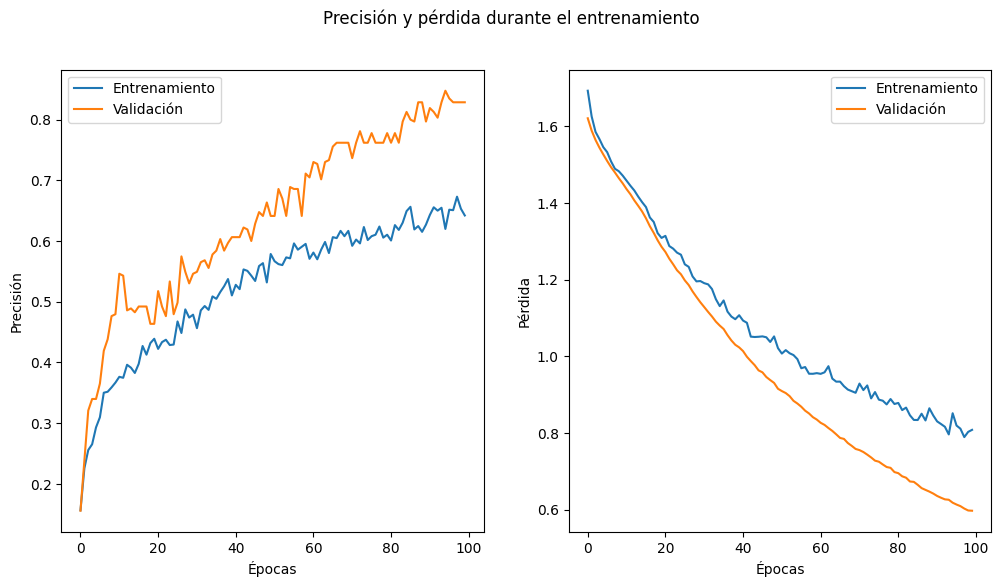

In [17]:
# Precisión durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida durante el entrenamiento
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.suptitle('Precisión y pérdida durante el entrenamiento')
plt.show()

## Predicciones

Primero predecimos las clases del conjunto de prueba.

In [18]:
y_pred = model1.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Mostramos la matriz de confusión.

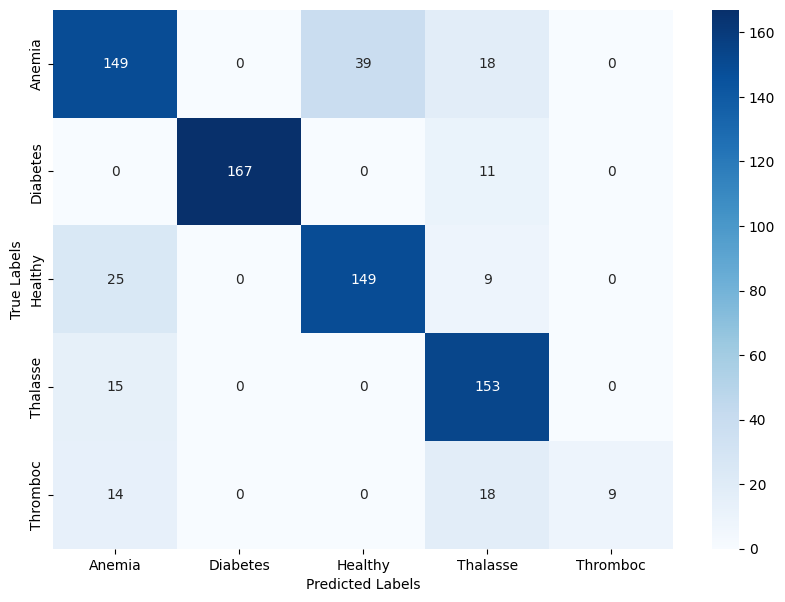

In [19]:
conf_mat = confusion_matrix(y_test_encoded, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Mostramos las métricas de clasificación.

In [20]:
report1 = classification_report(y_test_encoded, y_pred_classes, target_names=encoder.classes_)
print(report1)

              precision    recall  f1-score   support

      Anemia       0.73      0.72      0.73       206
    Diabetes       1.00      0.94      0.97       178
     Healthy       0.79      0.81      0.80       183
    Thalasse       0.73      0.91      0.81       168
    Thromboc       1.00      0.22      0.36        41

    accuracy                           0.81       776
   macro avg       0.85      0.72      0.73       776
weighted avg       0.82      0.81      0.80       776



Podemos observar que `Thalasse` y `Thromboc`  tienen una precisión perfecta pero un recall muy bajo. Esto significa que cada vez que predice una de estas dos clases es muy probable que sea correcto, pero que el modelo no detecta muchos de los casos con estas enfermedades.

También observamos que `Diabetes` tiene el F-score más alto, por lo que el modelo es efectivo para identificar correctamente a este tipo de pacientes. `Anemia` también tiene un F-score alto.

# Red neuronal 2 capas



## Construcción del modelo

Definimos el modelo de red neuronal y añadimos las capas correspondientes.



In [21]:
model2 = Sequential()
model2.add(Dense(10, activation='relu', input_dim=X_train.shape[1])) # 1a capa oculta
model2.add(Dropout(0.3)) # dropout 1a capa oculta
model2.add(Dense(10, activation='relu'))  # 2a capa oculta
model2.add(Dropout(0.3))  # dropout 2a capa oculta
model2.add(Dense(5, activation='softmax')) # capa de salida
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │             190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355 (1.39 KB)

 Trainable params: 355 (1.39 KB)

 Non-trainable params: 0 (0.00 B)

El número de parámetros se calcula con la siguiente fórmula:

$$
\text{Param} = (\text{nº entradas} + 1) * \text{nº neuronas}
$$

$$
\text{Param(1a capa oculta)} = (18 + 1) * 10 = 190
$$

$$
\text{Param(2a capa oculta)} = (10 + 1) * 10 = 110
$$

$$
\text{Param(capa salida)} = (10 + 1) * 5 = 55
$$

En total, hay $355$ $(190 + 110 + 55)$ parámetros que se pueden entrenar.

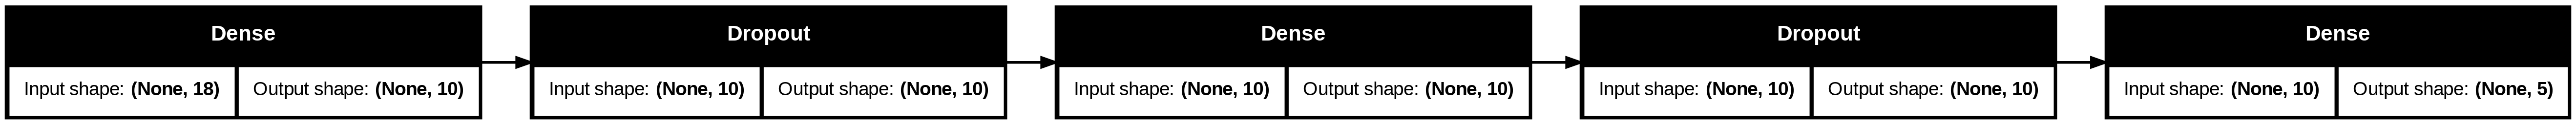

In [22]:
keras.utils.plot_model(model2, show_shapes=True, rankdir="LR")

## Entrenamiento del modelo

In [23]:
history = model2.fit(X_train, y_train_encoded, epochs=100, validation_split=0.2)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2873 - loss: 1.6333 - val_accuracy: 0.2349 - val_loss: 1.5548
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2839 - loss: 1.5616 - val_accuracy: 0.2857 - val_loss: 1.5226
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3080 - loss: 1.5162 - val_accuracy: 0.2825 - val_loss: 1.5012
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3018 - loss: 1.5086 - val_accuracy: 0.3270 - val_loss: 1.4793
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3093 - loss: 1.4908 - val_accuracy: 0.3746 - val_loss: 1.4576
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3308 - loss: 1.4802 - val_accuracy: 0.3778 - val_loss: 1.4393
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3800 - loss: 1.4345 - val_accuracy: 0.4730 - val_loss: 1.4225
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3661 - loss: 1.4265 - val_accuracy: 0.5111 - v

Visualizamos las curvas de aprendizaje.

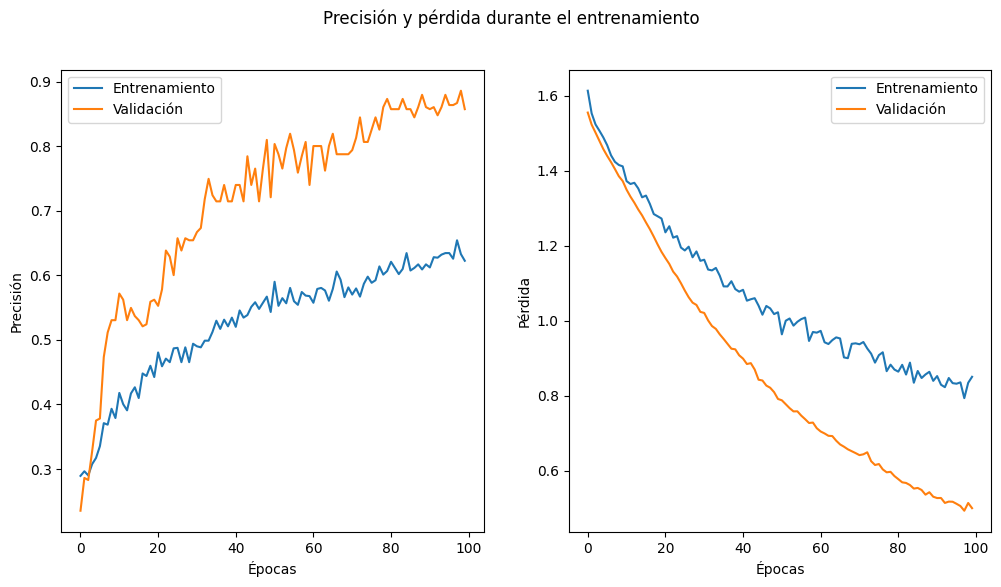

In [24]:
# Precisión durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida durante el entrenamiento
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.suptitle('Precisión y pérdida durante el entrenamiento')
plt.show()

## Predicciones

Primero predecimos las clases del conjunto de prueba.

In [25]:
y_pred = model2.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Mostramos la matriz de confusión.

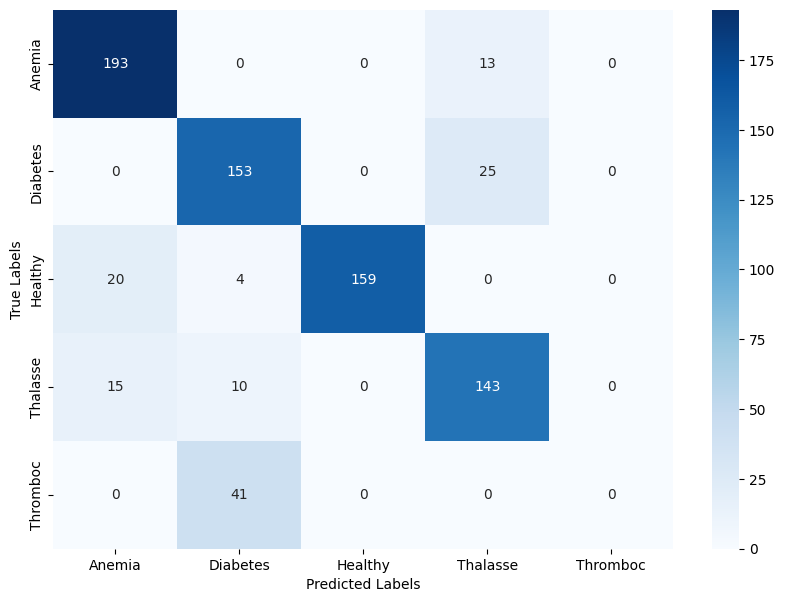

In [26]:
conf_mat = confusion_matrix(y_test_encoded, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Mostramos las métricas de clasificación.

In [27]:
report2 = classification_report(y_test_encoded, y_pred_classes, target_names=encoder.classes_)
print(report2)

              precision    recall  f1-score   support

      Anemia       0.85      0.94      0.89       206
    Diabetes       0.74      0.86      0.79       178
     Healthy       1.00      0.87      0.93       183
    Thalasse       0.79      0.85      0.82       168
    Thromboc       0.00      0.00      0.00        41

    accuracy                           0.84       776
   macro avg       0.67      0.70      0.69       776
weighted avg       0.80      0.84      0.81       776



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Podemos observar que `Thalasse` y `Thromboc`  tienen una precisión perfecta pero un recall muy bajo. Esto significa que cada vez que predice una de estas dos clases es muy probable que sea correcto, pero que el modelo no detecta muchos de los casos con estas enfermedades.

También observamos que `Diabetes` tiene el F-score más alto, por lo que el modelo es efectivo para identificar correctamente a este tipo de pacientes. `Anemia` también tiene un F-score alto.

# Comparación modelos

In [28]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Crear y entrenar el modelo de bosque aleatorio
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train_encoded)

# Obtener la importancia de las características
feature_importances = model_rf.feature_importances_

# Crear un DataFrame para mostrar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características ordenadas por su importancia
print(feature_importance_df)


                                      Feature  Importance
4                     Mean.Corpuscular.Volume    0.076031
14                                 Heart.Rate    0.073263
16                                   Troponin    0.066391
13                                        AST    0.063921
3                                   Platelets    0.063648
11                                      HbA1c    0.062066
1                                 Cholesterol    0.059588
7                                         BMI    0.059168
15                                 Creatinine    0.056094
10                              Triglycerides    0.051652
5   Mean.Corpuscular.Hemoglobin.Concentration    0.050142
12                            LDL.Cholesterol    0.049978
0                                     Glucose    0.049931
17                         C.reactive.Protein    0.048783
2                                  Hemoglobin    0.048145
6                                     Insulin    0.042333
9             